In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def imread(imgpath):
    return cv2.imread(imgpath)

def imread_gray(imgpath):
    return cv2.cvtColor(cv2.imread(imgpath), cv2.COLOR_BGR2RGB)

def imshow(img, cmap=None):
    plt.title(img.shape)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    
def create_and_draw_hist(img_RGB):
    img_HSV =  cv2.cvtColor(img_RGB, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([img_HSV],[0],None,[255],[0, 255])
#     cv2.normalize(hist,hist,0,255,cv2.NORM_MINMAX)
    plt.plot(hist)
    plt.show()

# Task - color histogram

## With opencv

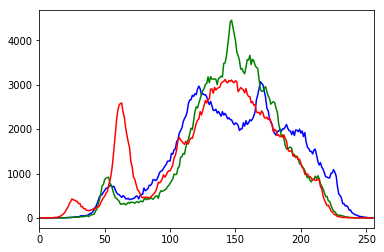

In [2]:
path_to_dataset = '../data/ukbench/'

img = imread(path_to_dataset + 'ukbench00000.jpg')

color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

## Custom implementation

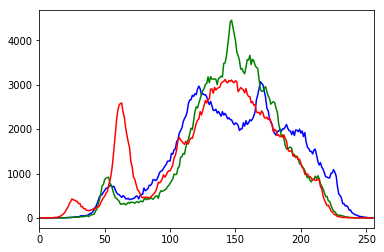

In [3]:
def calcHist(img, channel):
        pixels = img[:, :, channel]

        color_bins = np.zeros((256), dtype=np.float32)
        
        width = pixels.shape[0]
        height = pixels.shape[1]
        
        for y in range(height):
            for x in range (width):
                color_bins[pixels[x, y]]+=1

        return color_bins
            
# path_to_dataset = '../data/ukbench/ukbench'

img = imread(path_to_dataset + 'ukbench00000.jpg')

color = ('b','g','r')

for i,col in enumerate(color):
    histr = calcHist(img, i)
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

<b>Comments:</b> calcHist() is a simple custom implementation of color histogram. In this implementation it's not possible to set mask, bins, color_range, etc.

# Task - write a program to measure the L2 distance between color histograms of two images.

In [79]:
def l2_between_hist(img1, img2, channels):
    features1 = []
    features2 = []
    for channel in channels:

        hist1 = cv2.calcHist([img1],[channel],None,[256],[0,256])
#         hist1 = calcHist(img1,channel)
        cv2.normalize(hist1, hist1, 0, 255, norm_type=cv2.NORM_MINMAX)
        features1.extend(hist1)
        
        hist2 = cv2.calcHist([img2],[channel],None,[256],[0,256])
#         hist2 = calcHist(img2,channel)
        cv2.normalize(hist2, hist2, 0, 255, norm_type=cv2.NORM_MINMAX)
        features2.extend(hist2)
        
    return cv2.norm((np.array(features1).flatten() - np.array(features2).flatten()), cv2.NORM_L2)


small test

In [80]:
l2_between_hist(imread(path_to_dataset + 'ukbench00000.jpg'), imread(path_to_dataset + 'ukbench00000.jpg'), channels=[0,1,2])

0.0

In [81]:
l2_between_hist(imread_gray(path_to_dataset + 'ukbench00000.jpg'), imread_gray(path_to_dataset + 'ukbench00000.jpg'), channels=[0])

0.0

In [82]:
l2_between_hist(imread(path_to_dataset + 'ukbench00000.jpg'), imread(path_to_dataset + 'ukbench00001.jpg'), channels=[0,1,2])

699.1549352282461

In [83]:
l2_between_hist(imread_gray(path_to_dataset + 'ukbench00000.jpg'), imread_gray(path_to_dataset + 'ukbench00001.jpg'), channels=[0])

462.63905122505275

In [84]:
l2_between_hist(imread(path_to_dataset + 'ukbench00004.jpg'), imread(path_to_dataset + 'ukbench00006.jpg'), channels=[0,1,2])

2388.537498140064

<b>Comments:</b> I used cv2.calcHist just in order to get faster calculation time.

# Task - find 10 best matches

In [138]:
# return sorted (from small to big):
# [0] - filenames (closest images)
# [1] - corresponding L2 distances
def find_best_matches(image_name, path, num_similar = 10):
    original_image = path+image_name
    match_value = np.full(num_similar, 2**50)
    match_file = np.empty(num_similar, dtype='S150')
    
    for filename in (glob.glob(path + '/*.jpg')):
        # the same file
#         if (filename == original_image):
#             continue

        # calc distance
        dist = l2_between_hist(imread(original_image), imread(filename), channels=[0,1,2])
        
        # get min idx and value        
        max_idx = np.argmax(match_value)
        max_value = match_value[max_idx]
        
        # update array if needed         
        if max_value > dist:
            match_value[max_idx] = dist
            match_file[max_idx] = filename
        
    sorted_filenames = [x for _,x in sorted(zip(match_value, match_file))]
    sorted_values = np.sort(match_value)
    return (sorted_filenames, sorted_values)
        

In [139]:
# path = '../data/ukbench/'
queue = ["ukbench00004.jpg", "ukbench00040.jpg", "ukbench00060.jpg", "ukbench00588.jpg", "ukbench01562.jpg"]

Original image:  ukbench00004.jpg


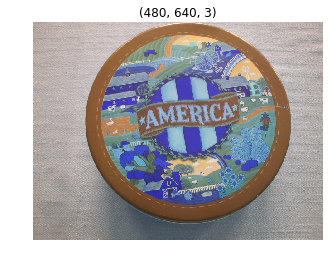

Similar image ../data/ukbench/ukbench00004.jpg  with L2 distance 0 


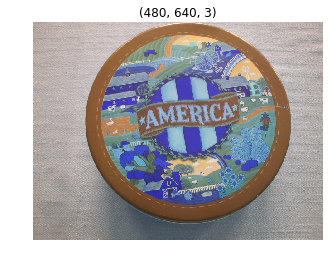

Similar image ../data/ukbench/ukbench00007.jpg  with L2 distance 875 


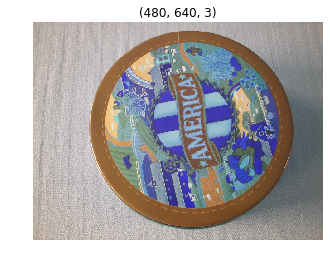

Similar image ../data/ukbench/ukbench01717.jpg  with L2 distance 1130 


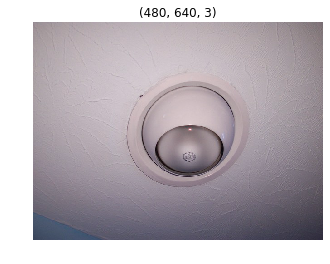

Similar image ../data/ukbench/ukbench00005.jpg  with L2 distance 1157 


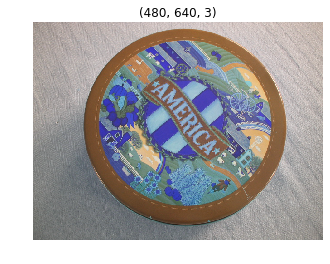

Similar image ../data/ukbench/ukbench00185.jpg  with L2 distance 1264 


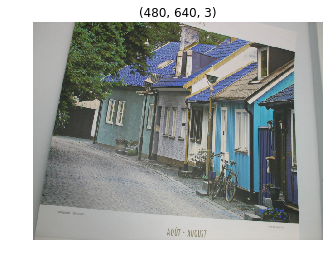

Similar image ../data/ukbench/ukbench00009.jpg  with L2 distance 1271 


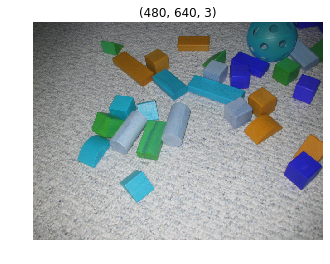

Similar image ../data/ukbench/ukbench00234.jpg  with L2 distance 1275 


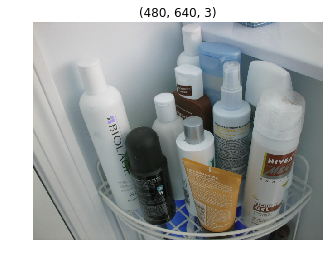

Similar image ../data/ukbench/ukbench01573.jpg  with L2 distance 1278 


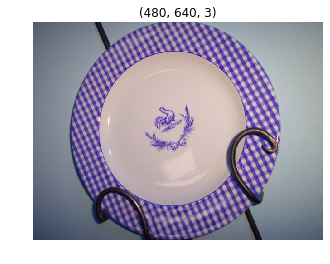

Similar image ../data/ukbench/ukbench01574.jpg  with L2 distance 1281 


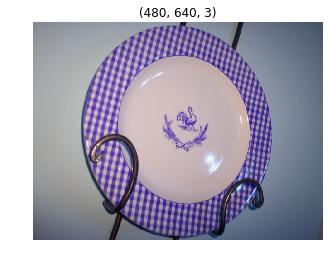

Similar image ../data/ukbench/ukbench00559.jpg  with L2 distance 1283 


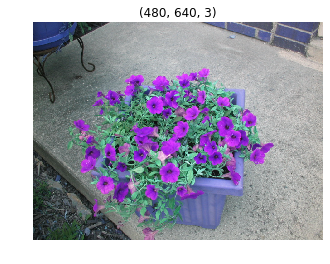

------------
Original image:  ukbench00040.jpg


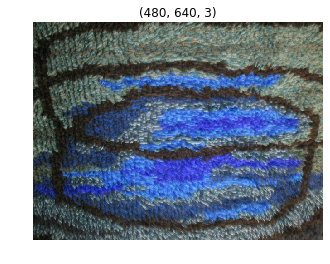

Similar image ../data/ukbench/ukbench00040.jpg  with L2 distance 0 


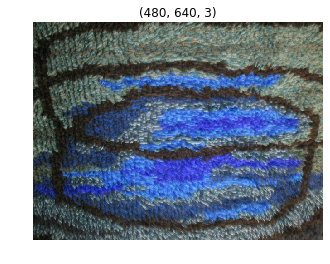

Similar image ../data/ukbench/ukbench00043.jpg  with L2 distance 557 


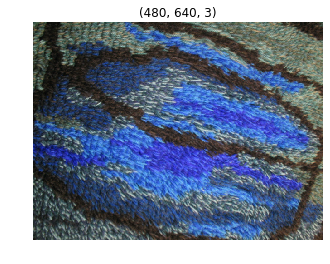

Similar image ../data/ukbench/ukbench00041.jpg  with L2 distance 666 


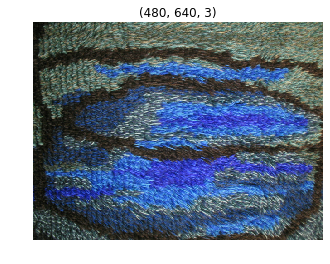

Similar image ../data/ukbench/ukbench00042.jpg  with L2 distance 734 


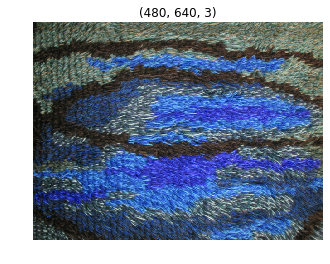

Similar image ../data/ukbench/ukbench01488.jpg  with L2 distance 1391 


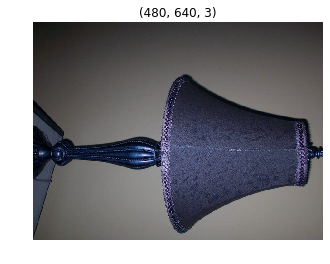

Similar image ../data/ukbench/ukbench00187.jpg  with L2 distance 1415 


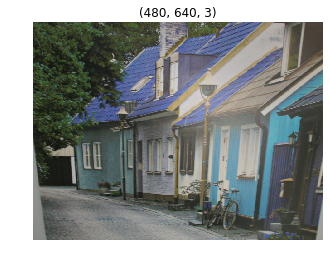

Similar image ../data/ukbench/ukbench00856.jpg  with L2 distance 1422 


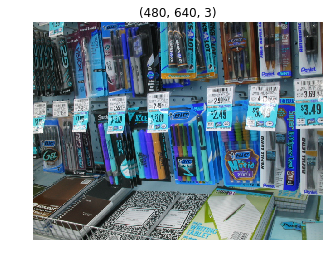

Similar image ../data/ukbench/ukbench00717.jpg  with L2 distance 1431 


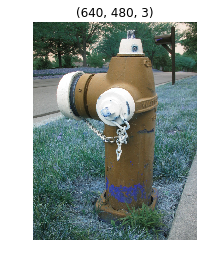

Similar image ../data/ukbench/ukbench00718.jpg  with L2 distance 1438 


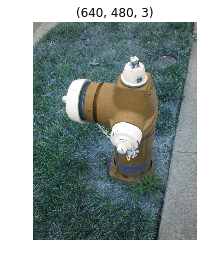

Similar image ../data/ukbench/ukbench01471.jpg  with L2 distance 1444 


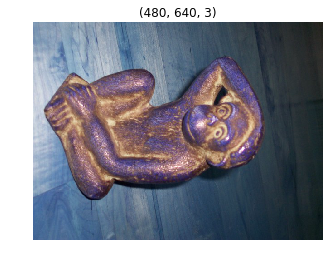

------------
Original image:  ukbench00060.jpg


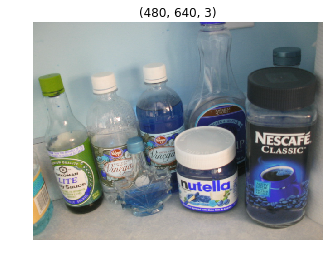

Similar image ../data/ukbench/ukbench00060.jpg  with L2 distance 0 


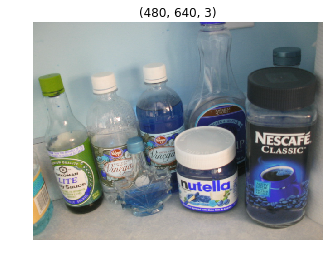

Similar image ../data/ukbench/ukbench00061.jpg  with L2 distance 703 


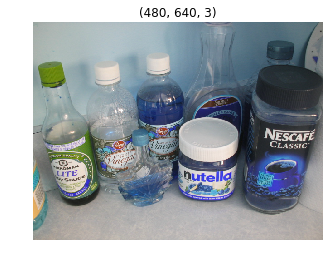

Similar image ../data/ukbench/ukbench00559.jpg  with L2 distance 891 


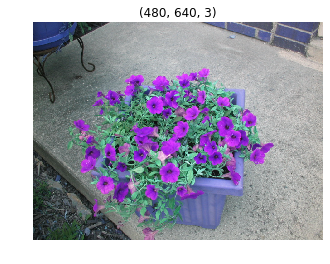

Similar image ../data/ukbench/ukbench00185.jpg  with L2 distance 995 


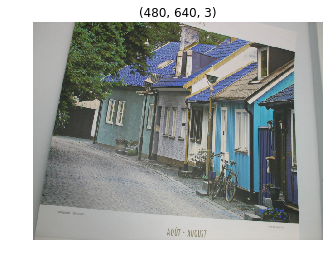

Similar image ../data/ukbench/ukbench00820.jpg  with L2 distance 1043 


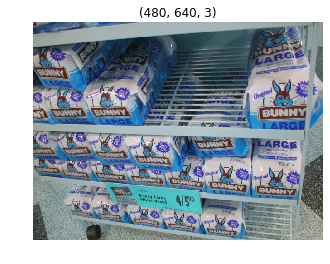

Similar image ../data/ukbench/ukbench00896.jpg  with L2 distance 1103 


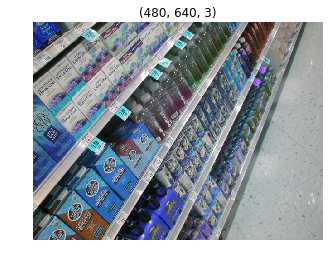

Similar image ../data/ukbench/ukbench00063.jpg  with L2 distance 1127 


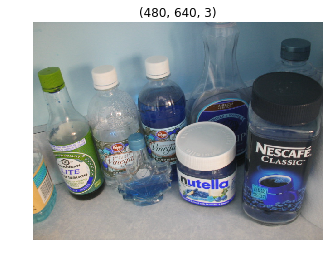

Similar image ../data/ukbench/ukbench00822.jpg  with L2 distance 1172 


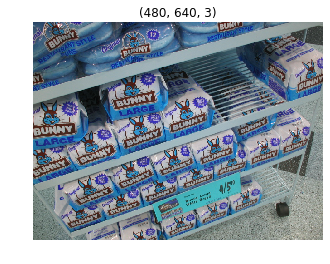

Similar image ../data/ukbench/ukbench00235.jpg  with L2 distance 1180 


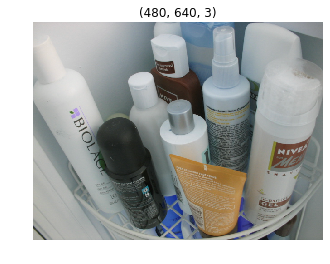

Similar image ../data/ukbench/ukbench00931.jpg  with L2 distance 1190 


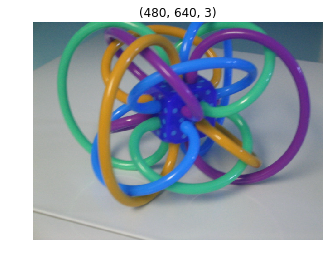

------------
Original image:  ukbench00588.jpg


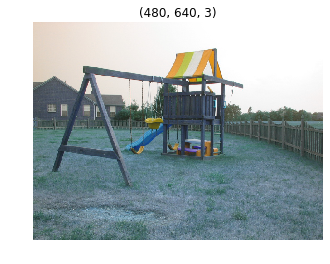

Similar image ../data/ukbench/ukbench00588.jpg  with L2 distance 0 


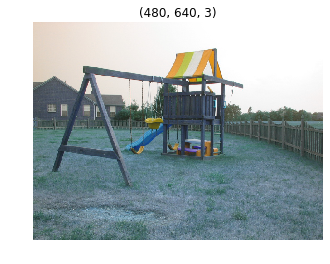

Similar image ../data/ukbench/ukbench00566.jpg  with L2 distance 261 


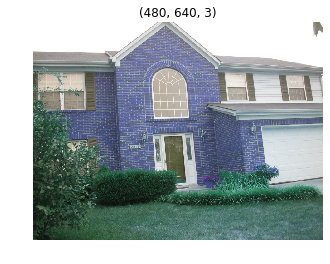

Similar image ../data/ukbench/ukbench00650.jpg  with L2 distance 273 


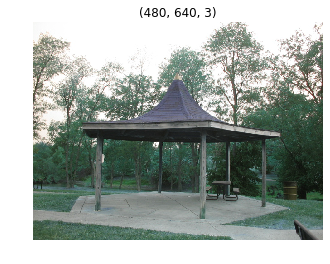

Similar image ../data/ukbench/ukbench00651.jpg  with L2 distance 281 


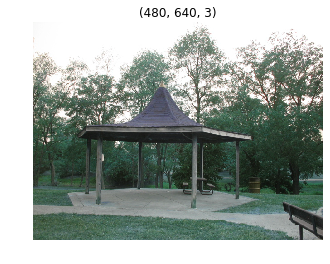

Similar image ../data/ukbench/ukbench00565.jpg  with L2 distance 288 


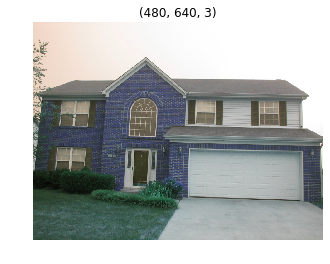

Similar image ../data/ukbench/ukbench01844.jpg  with L2 distance 289 


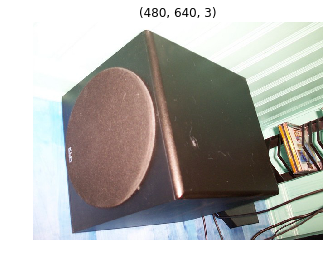

Similar image ../data/ukbench/ukbench00638.jpg  with L2 distance 303 


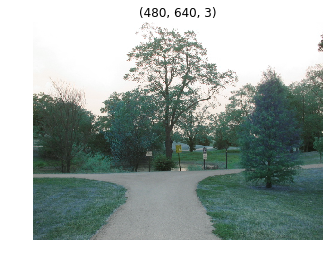

Similar image ../data/ukbench/ukbench01808.jpg  with L2 distance 315 


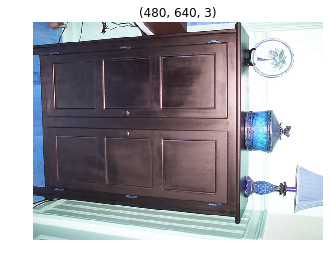

Similar image ../data/ukbench/ukbench00567.jpg  with L2 distance 325 


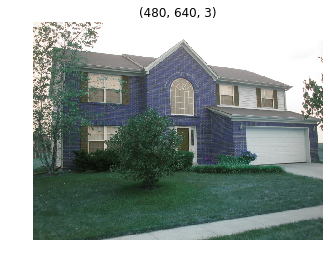

Similar image ../data/ukbench/ukbench00639.jpg  with L2 distance 329 


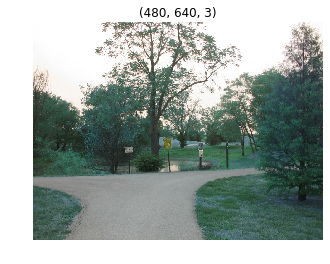

------------
Original image:  ukbench01562.jpg


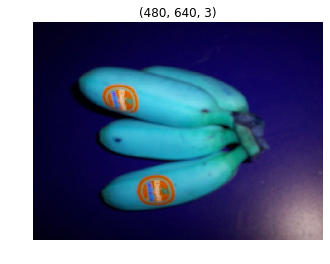

Similar image ../data/ukbench/ukbench01562.jpg  with L2 distance 0 


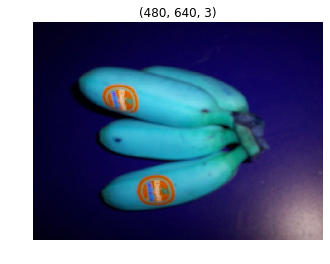

Similar image ../data/ukbench/ukbench01561.jpg  with L2 distance 667 


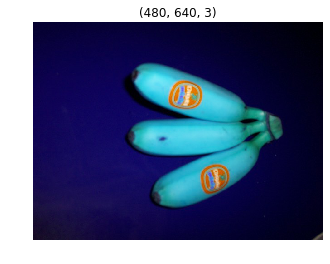

Similar image ../data/ukbench/ukbench01646.jpg  with L2 distance 683 


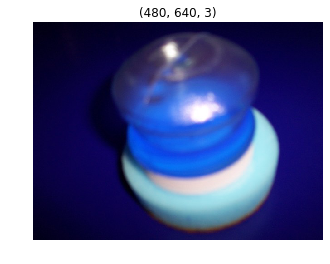

Similar image ../data/ukbench/ukbench01589.jpg  with L2 distance 724 


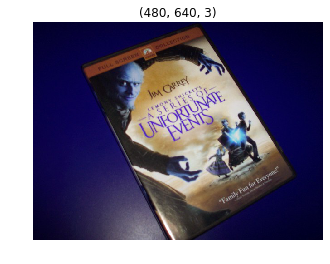

Similar image ../data/ukbench/ukbench01612.jpg  with L2 distance 726 


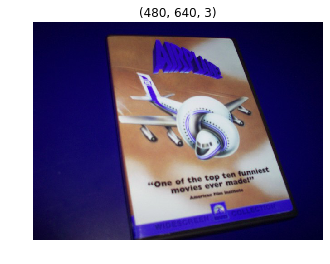

Similar image ../data/ukbench/ukbench01601.jpg  with L2 distance 731 


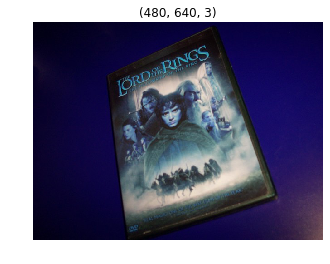

Similar image ../data/ukbench/ukbench01604.jpg  with L2 distance 778 


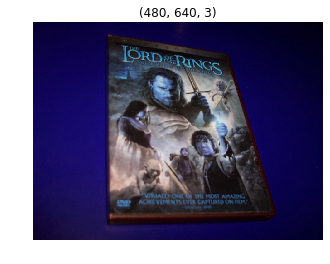

Similar image ../data/ukbench/ukbench01643.jpg  with L2 distance 794 


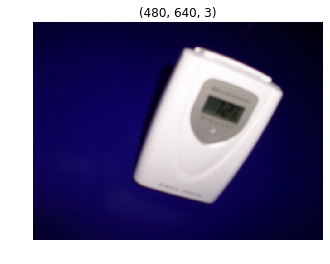

Similar image ../data/ukbench/ukbench01591.jpg  with L2 distance 798 


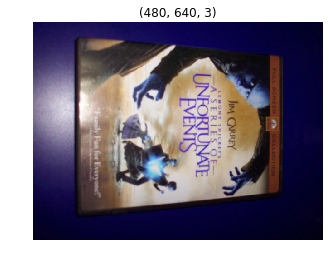

Similar image ../data/ukbench/ukbench01592.jpg  with L2 distance 800 


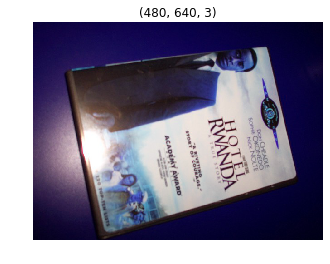

------------


In [140]:
results=[]
for img_name in queue:
    result = find_best_matches(img_name, path_to_dataset)
    results.append(result)
    print("Original image: ", img_name)
    imshow(imread(path_to_dataset + img_name))
    plt.show()
    for i in range(len(result[0])):
        print("Similar image %s  with L2 distance %d " % (result[0][i].decode('UTF-8'), result[1][i]) )
        imshow(imread(result[0][i].decode('UTF-8')))
        plt.show()
    print("------------")

# Task - write a program to measure and plot the P-R curve for each query.

In [145]:
def draw_pr_curve(y_test, y_score):
    # function to build P-R curve
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    from inspect import signature

    average_precision = average_precision_score(y_test, y_score)

    print('Average precision-recall score: {0:0.2f}'.format(
          average_precision))

    precision, recall, _ = precision_recall_curve(y_test, y_score)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
    plt.show()
    
def get_number_from_filename(filename):
    return int(filename[len(path_to_dataset+'ukbench'):-4])

Draw P-R curve for:  ukbench00004.jpg
Average precision-recall score: 0.85


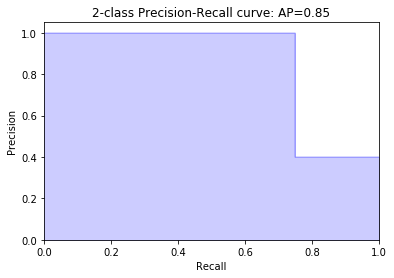

Draw P-R curve for:  ukbench00040.jpg
Average precision-recall score: 1.00


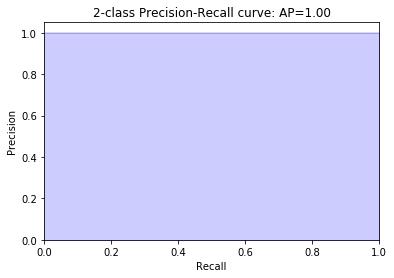

Draw P-R curve for:  ukbench00060.jpg
Average precision-recall score: 0.53


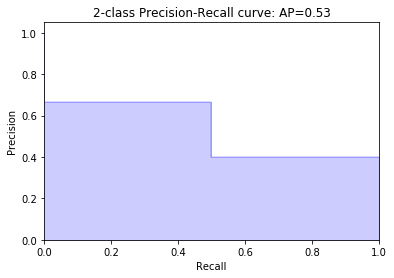

Draw P-R curve for:  ukbench00588.jpg
Average precision-recall score: 0.55


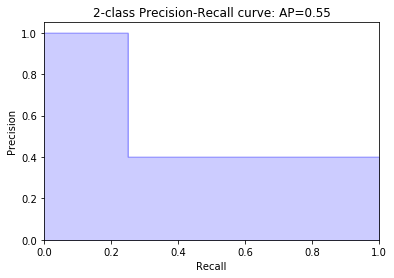

Draw P-R curve for:  ukbench01562.jpg
Average precision-recall score: 0.55


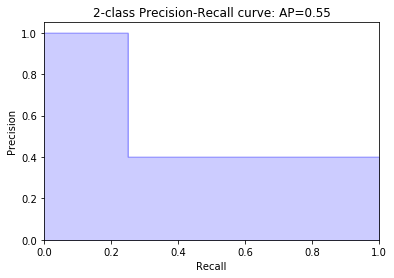

In [147]:
y_test=np.array([1,1,1,1,0,0,0,0,0,0])

i = 0
for img_name in queue:
    init_number = get_number_from_filename(path_to_dataset+img_name)
    y_score=np.zeros(y_test.shape[0])
    result = results[i]
    
    j = 0
    for matched_name in result[0]:
        matched_number = get_number_from_filename(matched_name)
        t = matched_number in range(init_number, init_number + 4)
        y_score[j] = t
        j += 1
    i += 1
    
    print("Draw P-R curve for: ", img_name)
    draw_pr_curve(y_test, y_score)

# Task - discuss and explain success and failure cases

Here I used color RGB normalised histogram to compare images. This is very simple approach but not very stable. Fails are possible when colors change in comparison with initial image. For example, image 'ukbench00006.jpg' has a bit different background color in comparison with 'ukbench00004.jpg' and as a result 'ukbench00006.jpg' wasn't detected by algorithm. 
<br> So this method should work well in case of geometrical transformation but not work in case of color transformation.